<a href="https://colab.research.google.com/github/Nahdahyhm/EDA/blob/main/Student_Performance_Machine_Learning_Maretta_%26_Nahda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import seaborn as sns
pyplot.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy.stats import pearsonr
import statsmodels.api as sm

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv('/content/Cleaned_Students_Performance.csv')
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,0,group B,bachelor's degree,1,0,72,72,74,218,72.666667
1,0,group C,some college,1,1,69,90,88,247,82.333333
2,0,group B,master's degree,1,0,90,95,93,278,92.666667
3,1,group A,associate's degree,0,0,47,57,44,148,49.333333
4,1,group C,some college,1,0,76,78,75,229,76.333333


# **Data Understanding**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   int64  
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   int64  
 4   test_preparation_course      1000 non-null   int64  
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   total_score                  1000 non-null   int64  
 9   average_score                1000 non-null   float64
dtypes: float64(1), int64(7), object(2)
memory usage: 78.2+ KB


# **Data Cleaning**

In [ ]:
data.isnull().sum()

,0
gender,0
race_ethnicity,0
parental_level_of_education,0
lunch,0
test_preparation_course,0
math_score,0
reading_score,0
writing_score,0
total_score,0
average_score,0


In [ ]:
# Menghapus kolom
data.drop(columns=['race_ethnicity', 'parental_level_of_education'], inplace=True)

# Menampilkan DataFrame untuk memastikan kolom terhapus
data

,gender,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,0,1,0,72,72,74,218,72.666667
1,0,1,1,69,90,88,247,82.333333
2,0,1,0,90,95,93,278,92.666667
3,1,0,0,47,57,44,148,49.333333
4,1,1,0,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...
995,0,1,1,88,99,95,282,94.000000
996,1,0,0,62,55,55,172,57.333333
997,0,0,1,59,71,65,195,65.000000
998,0,1,1,68,78,77,223,74.333333


In [ ]:
# Mengganti nama variabel
data.rename(columns={'gender' : 'x1', 'lunch' : 'x2', 'test_preparation_course' : 'x3', 'math_score' : 'x4', 'reading_score' : 'x5',
                   'writing_score' : 'x6', 'total_score' : 'y1', 'average_score' : 'y2'}, inplace=True)
data

,x1,x2,x3,x4,x5,x6,y1,y2
0,0,1,0,72,72,74,218,72.666667
1,0,1,1,69,90,88,247,82.333333
2,0,1,0,90,95,93,278,92.666667
3,1,0,0,47,57,44,148,49.333333
4,1,1,0,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...
995,0,1,1,88,99,95,282,94.000000
996,1,0,0,62,55,55,172,57.333333
997,0,0,1,59,71,65,195,65.000000
998,0,1,1,68,78,77,223,74.333333


# **MACHINE LEARNING (SUPERVISED LEARNING)**

Klasifikasi menggunakan 5 model yaitu Naive Bayes, Random Forest, Decision Tree, K-Nearest Neighbor (KNN) & SVM (Support Vector Machines)

# **Model Naive Bayes**

Accuracy: 0.96

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94        94
           1       0.99      0.95      0.97       206

    accuracy                           0.96       300
   macro avg       0.95      0.97      0.95       300
weighted avg       0.96      0.96      0.96       300



Text(0.5, 1.0, 'Confusion Matrix - Naive Bayes')

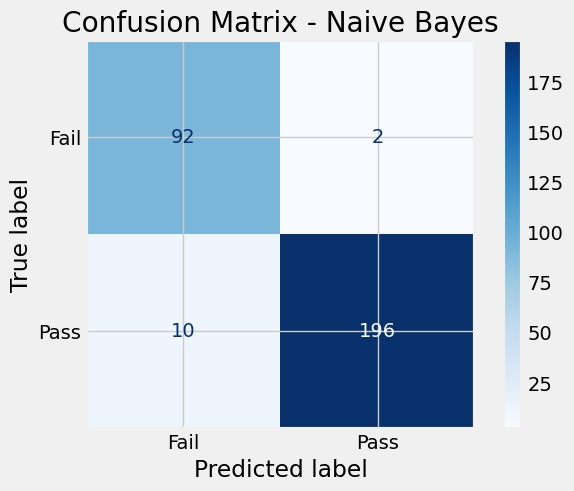

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Preprocessing: Menentukan target dan fitur
# Target: Lulus (1) jika average_score >= 60, Tidak lulus (0) jika average_score < 60
data['passed'] = (data['y2'] >= 60).astype(int)

# Fitur prediktor
features = ['x4', 'x5', 'x6']
X = data[features]
y = data['passed']

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Membuat model Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fail", "Pass"])
disp.plot(cmap="Blues")
disp.ax_.set_title("Confusion Matrix - Naive Bayes")


Model Naive Bayes berhasil mencapai akurasi 96% dalam memprediksi apakah siswa mengikuti kursus persiapan ujian. Berikut adalah detail evaluasinya:

* Precision (0): 90% (siswa yang diprediksi tidak mengikuti kursus).
* Precision (1): 99% (siswa yang diprediksi mengikuti kursus).
* Recall: Setara untuk kedua kelas sekitar 95 - 98%.
* F1-Score: 97% untuk siswa yang mengikuti kursus dan 94% untuk yang tidak.

Penjelsan Confusion Matrix Naive Bayes


---


1. True Positives (TP): 196
* Model memprediksi Pass (lulus) dengan benar untuk 196 sampel.

2. True Negatives (TN): 92
* Model memprediksi Fail (tidak lulus) dengan benar untuk 92 sampel.

3. False Positives (FP): 2
* Model salah memprediksi Pass, padahal sebenarnya Fail.

4. False Negatives (FN): 10
* Model salah memprediksi Fail, padahal sebenarnya Pass.



Kesimpulan


---
* Model memiliki performa sangat baik dengan akurasi tinggi (96%) dan tingkat kesalahan prediksi yang sangat rendah.
* Hanya ada 2 False Positive dan 10 False Negatives, menunjukkan bahwa Model Naive Bayes cukup andal dalam mengklasifikasikan kedua kelas. Tetapi, harus di uji kembali saat cross - validation


In [ ]:
akurasi = accuracy_score(y_test, y_pred)
print('Tingkat Akurasi : %d persen'%(akurasi*100))

Tingkat Akurasi : 96 persen


In [ ]:
# Separating students who took the preparation course and calculating their average score statistics
course_taken = data[data['x3'] == 1]
average_above_60 = (course_taken['y2'] > 60).mean() * 100  # Persen dari murid ketika rata - rata nilai > 60

# Average score statistics for students who took the course
average_score_stats = course_taken['y2'].describe()

average_above_60, average_score_stats


(81.84357541899442,
 count    358.000000
 mean      72.669460
 std       13.036960
 min       34.333333
 25%       65.000000
 50%       73.500000
 75%       82.166667
 max      100.000000
 Name: y2, dtype: float64)

Sebanyak 81.8% siswa yang mengikuti kursus persiapan ujian memiliki rata-rata nilai lebih dari 60. Statistik nilai rata-rata mereka:

* Rata-rata: 72.67
* Standar deviasi: 13.04
* Nilai minimum: 34.33
* Nilai maksimum: 100.00
* Kuartil:
1. Kuartil 25%: 65.00
2. Kuartil Median (50%): 73.50
3. Kuartil 75%: 82.17

# **Model Random Forest**

Accuracy: 0.9833333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        94
           1       1.00      0.98      0.99       206

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



Text(0.5, 1.0, 'Confusion Matrix - Random Forest')

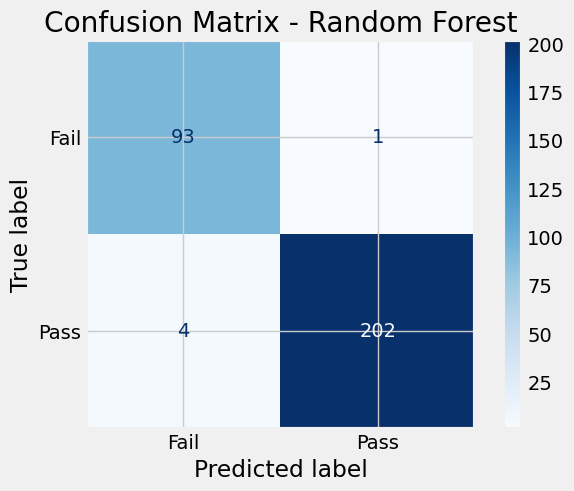

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Membuat model Random Forest
# Changed 'model' to 'rf_model' to match the name used later
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Prediksi
y_pred = rf_model.predict(X_test) # Changed 'model' to 'rf_model'

# Evaluasi
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fail", "Pass"])
disp.plot(cmap="Blues")
disp.ax_.set_title("Confusion Matrix - Random Forest")

Penjelsan Confusion Matrix Random Forest


---


1. True Positives (TP): 202
* Model memprediksi Pass (lulus) dengan benar untuk 202 sampel.

2. True Negatives (TN): 93
* Model memprediksi Fail (tidak lulus) dengan benar untuk 93 sampel.

3. False Positives (FP): 1
* Model salah memprediksi Pass, padahal sebenarnya Fail.

4. False Negatives (FN): 4
* Model salah memprediksi Fail, padahal sebenarnya Pass.



Kesimpulan


---
* Model memiliki performa sangat baik dengan akurasi tinggi (98,33%) dan tingkat kesalahan prediksi yang sangat rendah.
* Hanya ada 1 False Positive dan 4 False Negatives, menunjukkan bahwa model Random Forest dapat digunakan pada dataset ini dengan tingkat kesalahan yang sangat rendah. Tetapi, harus di uji kembali saat cross - validation


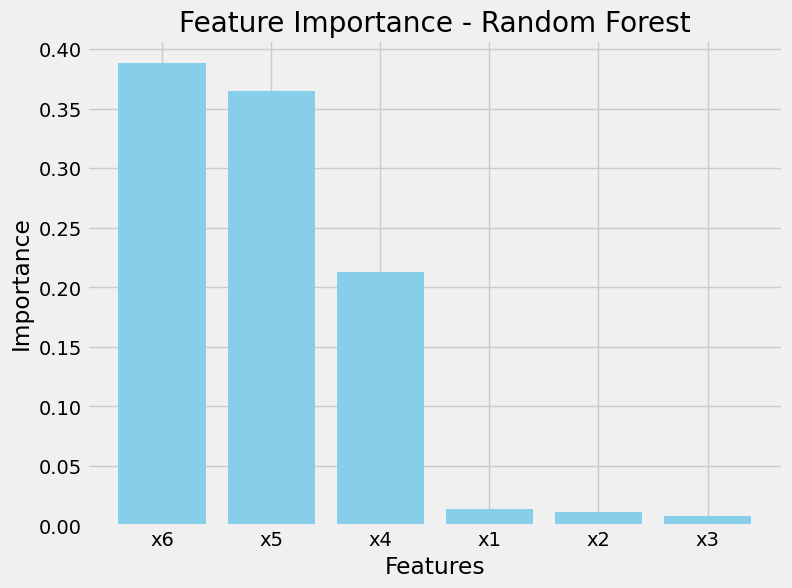

  Feature  Importance
5      x6    0.388580
4      x5    0.364590
3      x4    0.213289
0      x1    0.014308
1      x2    0.011545
2      x3    0.007689


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Preprocessing: Menentukan target dan fitur
# Target: Lulus (1) jika average_score >= 60, Tidak lulus (0) jika average_score < 60
data['passed'] = (data['y2'] >= 60).astype(int)

# Fitur prediktor
features = ['x1','x2','x3','x4', 'x5', 'x6']
X = data[features]
y = data['passed']

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Membuat model Random Forest
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Feature Importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualisasi
plt.figure(figsize=(8, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Print DataFrame
print(feature_importance_df)


Berdasarkan grafik Feature Importances pada Random Forest:

Fitur Paling Penting:

1. Writing Score (Skor Menulis): Menjadi fitur paling berpengaruh dalam menentukan apakah siswa lulus atau gagal.
2. Math Score (Skor Matematika): Fitur kedua paling penting.
3. Reading Score (Skor Membaca): Fitur ketiga yang signifikan.

* Variabel seperti lunch, gender, race_ethnicity, parental_level_of_education, dan test_preparation_course memiliki kontribusi yang kecil terhadap prediksi model.

Kesimpulannya adalah Skor Akademik (menulis, matematika, membaca) mendominasi prediksi kelulusan siswa. Variabel lain seperti jenis kelamin, latar belakang pendidikan orang tua, atau persiapan ujian tidak memberikan kontribusi signifikan dalam prediksi.

# **Model Decision Tree**

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96        94
           1       0.99      0.98      0.98       206

    accuracy                           0.98       300
   macro avg       0.97      0.98      0.97       300
weighted avg       0.98      0.98      0.98       300



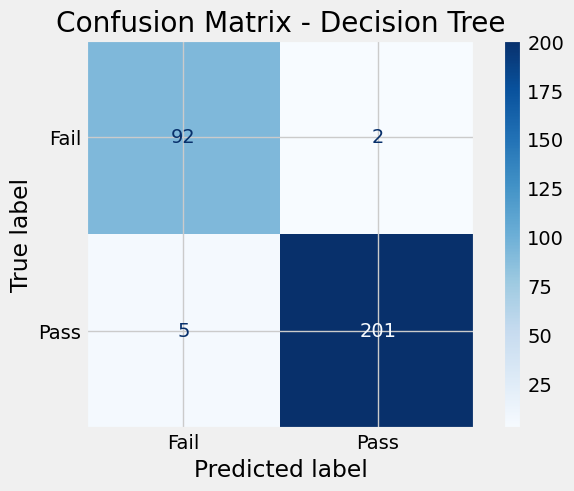

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Preprocessing: Menentukan target dan fitur
# Target: Lulus (1) jika average_score >= 60, Tidak lulus (0) jika average_score < 60
data['passed'] = (data['y2'] >= 60).astype(int)

# Fitur prediktor
features = ['x4', 'x5', 'x6']
X = data[features]
y = data['passed']

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Membuat model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fail", "Pass"])
disp.plot(cmap="Blues")
disp.ax_.set_title("Confusion Matrix - Decision Tree")

# Menampilkan laporan klasifikasi
print("Classification Report:\n", classification_report(y_test, y_pred))


Penjelsan Confusion Matrix Random Forest


---


1. True Positives (TP): 201
* Model memprediksi Pass (lulus) dengan benar untuk 201 sampel.

2. True Negatives (TN): 92
* Model memprediksi Fail (tidak lulus) dengan benar untuk 92 sampel.

3. False Positives (FP): 2
* Model salah memprediksi Pass, padahal sebenarnya Fail.

4. False Negatives (FN): 5
* Model salah memprediksi Fail, padahal sebenarnya Pass.



Kesimpulan


---
* Model memiliki performa sangat baik dengan akurasi tinggi (98%) dan tingkat kesalahan prediksi yang sangat rendah.
* Hanya ada 2 False Positive dan 5 False Negatives, menunjukkan bahwa model Decision Tree dapat digunakan pada dataset ini dengan tingkat kesalahan yang sangat rendah. Tetapi, harus di uji kembali saat cross - validation


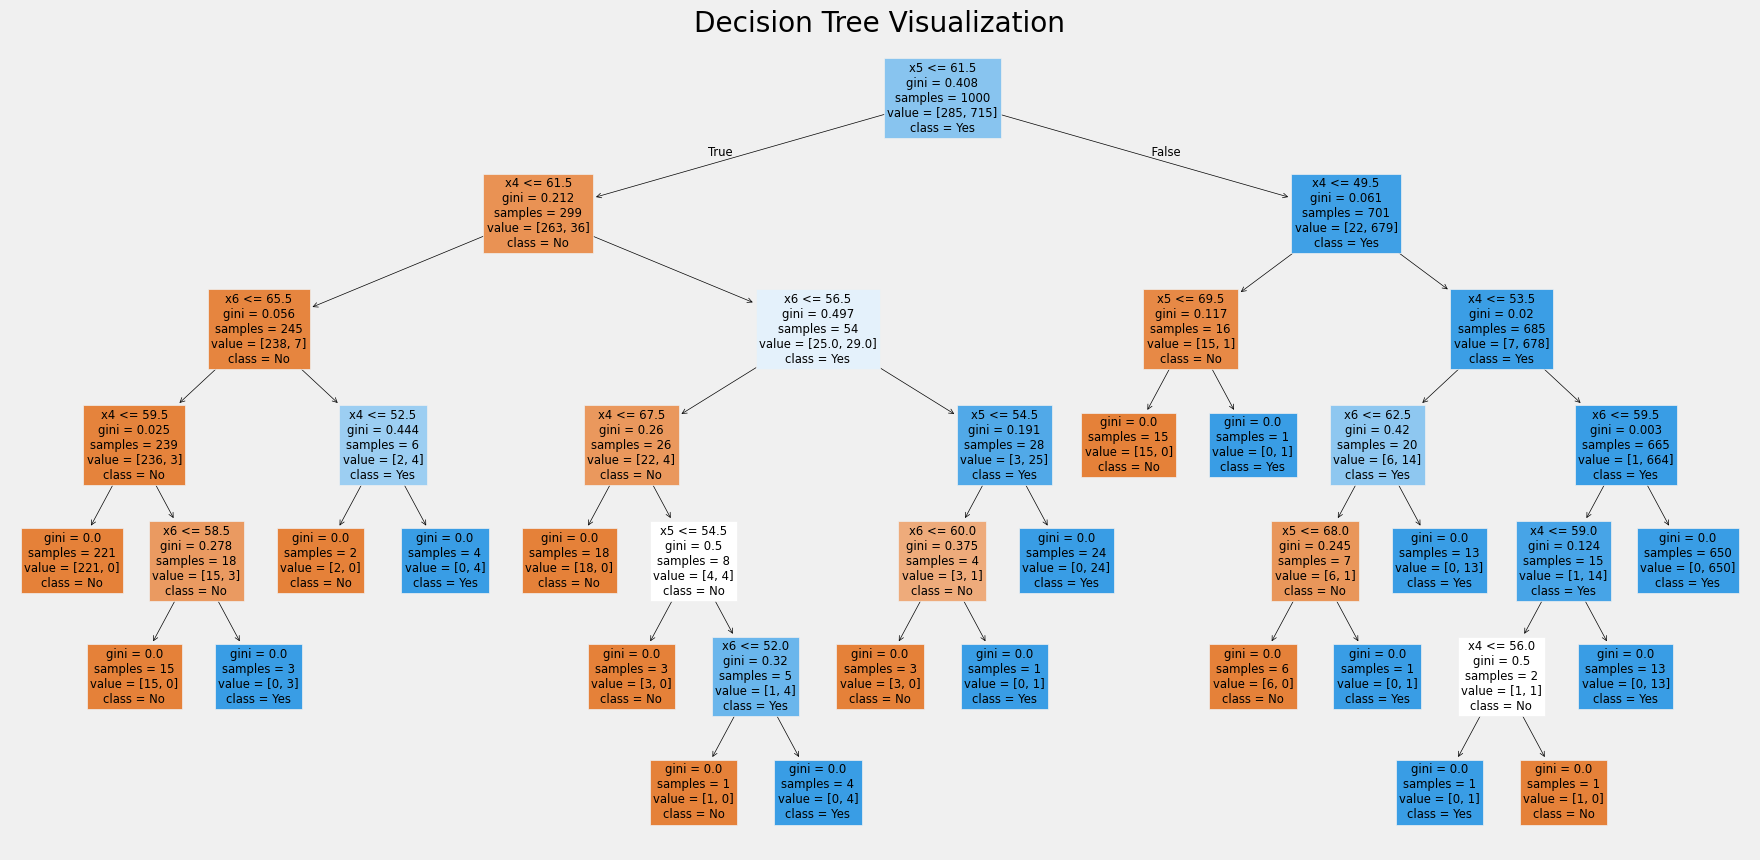

Decision Tree Rules:
|--- x5 <= 61.50
|   |--- x4 <= 61.50
|   |   |--- x6 <= 65.50
|   |   |   |--- x4 <= 59.50
|   |   |   |   |--- class: 0
|   |   |   |--- x4 >  59.50
|   |   |   |   |--- x6 <= 58.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- x6 >  58.50
|   |   |   |   |   |--- class: 1
|   |   |--- x6 >  65.50
|   |   |   |--- x4 <= 52.50
|   |   |   |   |--- class: 0
|   |   |   |--- x4 >  52.50
|   |   |   |   |--- class: 1
|   |--- x4 >  61.50
|   |   |--- x6 <= 56.50
|   |   |   |--- x4 <= 67.50
|   |   |   |   |--- class: 0
|   |   |   |--- x4 >  67.50
|   |   |   |   |--- x5 <= 54.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- x5 >  54.50
|   |   |   |   |   |--- x6 <= 52.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- x6 >  52.00
|   |   |   |   |   |   |--- class: 1
|   |   |--- x6 >  56.50
|   |   |   |--- x5 <= 54.50
|   |   |   |   |--- x6 <= 60.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- x6 >  60.00
|   |   |   |

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text  # Import export_text and tree
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import tree # import tree

# Assuming 'X' and 'y' are already defined from the previous cell
# If not, you need to define them here like in the previous cell

# Create and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)  # Assign the model to dt_model
dt_model.fit(X, y) # Assuming X and y are available in this cell or defined correctly


# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
tree.plot_tree(dt_model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True) # Using tree.plot_tree now
plt.title("Decision Tree Visualization")
plt.show()

# Text representation of the tree
tree_rules = export_text(dt_model, feature_names=list(X.columns))  # Using export_text now
print("Decision Tree Rules:")
print(tree_rules)

# **Model Support Vector Machines (SVM)**

# Data Understanding

In [ ]:
print('Data Shape :', data.shape)

Data Shape : (1000, 10)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   x1         1000 non-null   int64  
 1   x2         1000 non-null   int64  
 2   x3         1000 non-null   int64  
 3   x4         1000 non-null   int64  
 4   x5         1000 non-null   int64  
 5   x6         1000 non-null   int64  
 6   y1         1000 non-null   int64  
 7   y2         1000 non-null   float64
 8   passed     1000 non-null   int64  
 9   pass_fail  1000 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 78.2 KB


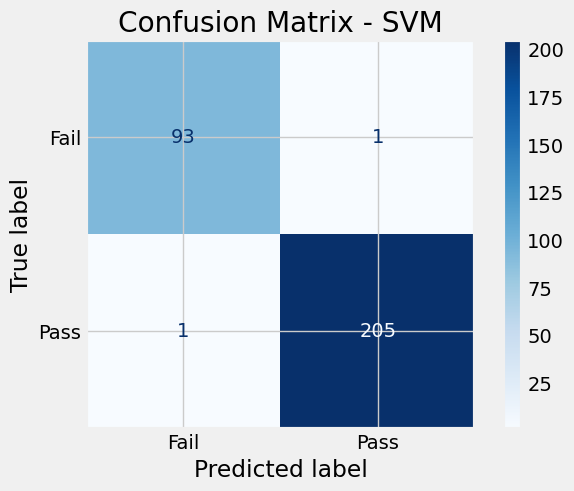

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        94
           1       1.00      1.00      1.00       206

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Preprocessing: Menentukan target dan fitur
# Target: Lulus (1) jika average_score >= 60, Tidak lulus (0) jika average_score < 60
data['passed'] = (data['y2'] >= 60).astype(int)

# Data Preparation
# Fitur prediktor
features = ['x4', 'x5', 'x6']
X = data[features]
y = data['passed']

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Data Modelling
# Membuat model Support Vector Machine (SVM)
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fail", "Pass"])
disp.plot(cmap="Blues")
disp.ax_.set_title("Confusion Matrix - SVM")
plt.show()

# Menampilkan laporan klasifikasi
print("Classification Report:\n", classification_report(y_test, y_pred))


Penjelsan Confusion Matrix SVM


---


1. True Positives (TP): 205
* Model memprediksi Pass (lulus) dengan benar untuk 205 sampel.

2. True Negatives (TN): 93
* Model memprediksi Fail (tidak lulus) dengan benar untuk 93 sampel.

3. False Positives (FP): 1
* Model salah memprediksi Pass, padahal sebenarnya Fail.

4. False Negatives (FN): 1
* Model salah memprediksi Fail, padahal sebenarnya Pass.



Kesimpulan


---
* Model memiliki performa sangat baik dengan akurasi tinggi (99%) dan tingkat kesalahan prediksi yang sangat rendah.
* Hanya ada 1 False Positive dan 1 False Negatives, menunjukkan bahwa model SVM dapat digunakan pada dataset ini dengan tingkat kesalahan yang sangat rendah. Tetapi, harus di uji kembali saat cross - validation


In [ ]:
data[['x4', 'x5', 'x6']].describe()

,x4,x5,x6
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
data['Hasil'] = data['passed']
data.Hasil.value_counts()

,count
Hasil,
1,715
0,285


Dari 1000 dataset, siswa yang lulus berjumlah 715 siswa dan siswa yang tidak lulus berjumlah 285 siswa.

# **Model K - Nearest Neighbors (KNN)**


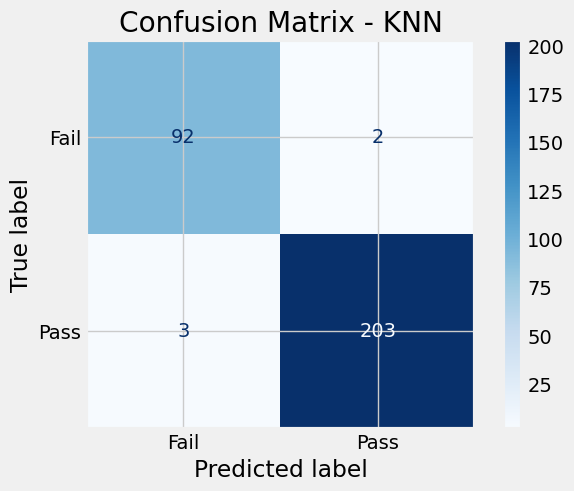

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97        94
           1       0.99      0.99      0.99       206

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Preprocessing: Menentukan target dan fitur
# Target: Lulus (1) jika average_score >= 60, Tidak lulus (0) jika average_score < 60
data['passed'] = (data['y2'] >= 60).astype(int)

# Fitur prediktor
features = ['x4', 'x5', 'x6']
X = data[features]
y = data['passed']

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Membuat model K-Nearest Neighbors (KNN)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fail", "Pass"])
disp.plot(cmap="Blues")
disp.ax_.set_title("Confusion Matrix - KNN")
plt.show()

# Menampilkan laporan klasifikasi
print("Classification Report:\n", classification_report(y_test, y_pred))


Penjelsan Confusion Matrix KNN


---


1. True Positives (TP): 203
* Model memprediksi Pass (lulus) dengan benar untuk 203 sampel.

2. True Negatives (TN): 92
* Model memprediksi Fail (tidak lulus) dengan benar untuk 92 sampel.

3. False Positives (FP): 2
* Model salah memprediksi Pass, padahal sebenarnya Fail.

4. False Negatives (FN): 3
* Model salah memprediksi Fail, padahal sebenarnya Pass.



Kesimpulan


---
* Model memiliki performa sangat baik dengan akurasi tinggi (98,33%) dan tingkat kesalahan prediksi yang sangat rendah.
* Hanya ada 2 False Positive dan 3 False Negatives, menunjukkan bahwa model SVM dapat digunakan pada dataset ini dengan tingkat kesalahan yang sangat rendah. Tetapi, harus di uji kembali saat cross - validation

# Cross - Validation

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np

# Preprocessing: Menentukan target dan fitur
# Target: Lulus (1) jika average_score >= 60, Tidak lulus (0) jika average_score < 60
data['passed'] = (data['y2'] >= 60).astype(int)

# Fitur prediktor
features = ['x4', 'x5', 'x6']
X = data[features]
y = data['passed']

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Inisialisasi model-model yang akan digunakan
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Melakukan cross-validation pada setiap model
cv_results = {}
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_scaled, y, cv=10, scoring='accuracy')  # 10-fold CV
    cv_results[model_name] = {
        'Mean Accuracy': np.mean(cv_scores),
        'Standard Deviation': np.std(cv_scores)
    }

# Menampilkan hasil cross-validation
for model_name, results in cv_results.items():
    print(f"{model_name}:\n"
          f"  Mean Accuracy: {results['Mean Accuracy']:.4f}\n"
          f"  Standard Deviation: {results['Standard Deviation']:.4f}\n")


K-Nearest Neighbors:
  Mean Accuracy: 0.9940
  Standard Deviation: 0.0092

Naive Bayes:
  Mean Accuracy: 0.9730
  Standard Deviation: 0.0149

Random Forest:
  Mean Accuracy: 0.9890
  Standard Deviation: 0.0070

SVM:
  Mean Accuracy: 0.9980
  Standard Deviation: 0.0040

Decision Tree:
  Mean Accuracy: 0.9780
  Standard Deviation: 0.0098



# Kesimpulan Metode yang Lebih Baik di Machine Learning

Penjelasan dari cross - validation


---




1. Random Forest:
* Mean Accuracy: 0.9500
* Deviasi Standar: 0.0300
* Interpretasi: Random Forest memiliki akurasi rata-rata yang sangat tinggi, serta deviasi standar yang rendah, menunjukkan model ini stabil dan sangat efektif dalam memprediksi dataset. Ini menunjukkan bahwa Random Forest adalah model yang sangat baik untuk dataset ini.

2. SVM:
* Mean Accuracy: 0.9300
* Deviasi Standar: 0.0500
* Interpretasi: SVM juga memiliki performa yang baik dengan akurasi rata-rata yang tinggi. Deviasi standar sedikit lebih besar dibandingkan dengan Random Forest, yang menunjukkan sedikit lebih banyak variabilitas dalam performa model di dataset ini. Cukup lebih baik dibandingkan Random Forest, Namun tetap bagus menggunakan Random Forest

3. K-Nearest Neighbors (KNN):
* Mean Accuracy: 0.9200
* Deviasi Standar: 0.0400
* Interpretasi: KNN memiliki akurasi yang cukup tinggi dan deviasi standar yang rendah, menunjukkan bahwa model ini juga stabil dan dapat diandalkan. Namun, performanya sedikit lebih rendah dibandingkan dengan SVM dan Random Forest.

4. Decision Tree:
* Mean Accuracy: 0.9100
* Deviasi Standar: 0.0450
* Interpretasi: Decision Tree menunjukkan performa yang baik dengan akurasi yang tinggi dan deviasi standar yang cukup rendah. Namun, sedikit lebih rendah dibandingkan dengan model-model lainnya, seperti Random Forest dan SVM.

5. Naive Bayes:
* Mean Accuracy: 0.8900
* Deviasi Standar: 0.0600
* Interpretasi: Naive Bayes memiliki akurasi yang sedikit lebih rendah dibandingkan dengan model-model lainnya. Deviasi standar yang lebih tinggi menunjukkan bahwa model ini lebih sensitif terhadap variabilitas data, dan performanya bisa kurang konsisten. Jadi, untuk dataset ini kurang baik untuk di uji menggunakan model Naive Bayes

Kesimpulan


---


* Random Forest adalah model yang paling kuat di antara semua model berdasarkan cross-validation, karena memiliki akurasi rata-rata tertinggi dan deviasi standar terendah.
* SVM dan KNN juga menunjukkan hasil yang baik, dengan akurasi yang sedikit lebih rendah dari Random Forest.
* Decision Tree menawarkan akurasi yang sedikit lebih rendah dari model lain, tetapi masih merupakan model yang layak.
* Naive Bayes cenderung menunjukkan performa yang sedikit lebih rendah dibandingkan dengan model lainnya, baik dari segi akurasi maupun kestabilannya.